**相关分析**：研究两个或两个以上的变量之间的相关程度的一种统计方法。自然界和社会中，由于受到了各种因素的影响，事物之间往往存在复杂的关系，即一种事物或者变量的变化受到了另外一些事物或变量变化的影响。有的时候这种变化关系是确定的，在数学上称之为函数关系；但更多的时候，变量之间确实存在某种程度的依赖关系，但不能由一个变化的量精确地推断出另一个量发生多大的变化。比如子女身高与父母身高的关系、大学信息技术课程的分数与大学程序设计课程的分数等。  

数学上，研究两个或两个以上事物之间相关程度的强弱，并用适当的统计指标表现出来的过程，称之为**相关分析**。相关分析的分类描述如下：  
<img src='resource/相关关系分类.png' style='zoom:70%'>  

相关系数 r：衡量相关强度的指标。有以下几个特点： 
1. r 的数值范围 \[-1,1\]  
2. |r| 表示变量之间的相关强度，绝对值越接近1，相关强度越强；绝对值越接近0，相关强度越弱。  
3. r 的正负号表示变化方向。+ 表示正相关，变量之间的变化方向是一致的；- 表示负相关，变量之间的变化方向相反。 
4. 相关系数只能揭示变量之间的相关性，不代表因果性。  

## 【案例1】学生两门课程成绩的相关分析  

```问题描述：```  

已知学生的《大学信息技术（甲）》和《大学程序设计（Python）》的期末卷面分数，请问两门课程的成绩是否具有一定的相关性？

#### 1. 打开本地数据文件  

* np.loadtxt()

In [1]:
import numpy as np

scores = np.loadtxt('data\\2020期末成绩.csv',dtype=np.int32, delimiter='\t')
print(scores.shape)

(117, 2)


#### 2. 绘制散点图  

采用 Matplotlib 库下的 Pyplot 子库绘制散点图。  

* import matplotlib.pyplot as plt  
* %matplotlib inline  
* plt.figure()  
* plt.scatter()

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

Text(0, 0.5, '《大学程序设计（Python）》成绩')

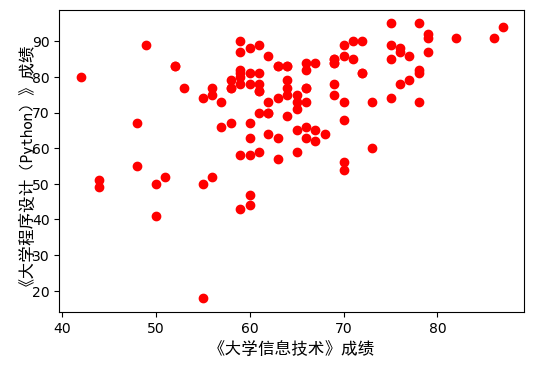

In [2]:
import matplotlib.pyplot as plt



plt.figure(figsize=(6,4),dpi=100)
x = scores[:,0]
y = scores[:,1]
plt.scatter(x,y,color='red')
plt.xlabel('《大学信息技术》成绩',fontproperties="SimHei",size=12)
plt.ylabel('《大学程序设计（Python）》成绩',fontproperties="SimHei",size=12)

#### 3. 计算皮尔逊相关系数并进行显著性检验  

皮尔逊相关系数用来衡量两个连续型的随机正态变量之间的线性关系。我们可以使用 numpy 的基本运算公式构造皮尔逊相关系数公式来计算；或者采用 **Scipy** 库中的 stats 模块来计算。

* from scipy import stats 
* stats.pearsonr()

Scipy （Science Python）是高级科学计算库：和Numpy联系很密切，Scipy一般都是操控Numpy数组来进行科学计算、统计分析，所以可以说是基于Numpy之上了。Scipy有很多子模块可以应对不同的应用，例如插值运算，优化算法等等。SciPy则是在NumPy的基础上构建的更为强大，应用领域也更为广泛的科学计算包。正是出于这个原因，SciPy需要依赖NumPy的支持进行安装和运行。

In [3]:
from scipy import stats

cor, pv = stats.pearsonr(scores[:,0], scores[:,1])
print(f"皮尔逊相关系数：{cor}\n显著性检验水平：{pv}")

皮尔逊相关系数：0.4857717856278414
显著性检验水平：2.828986359919885e-08


```结果分析```  

统计意义上来看，总体的成绩相关性不为0，即《大学信息技术》与《大学程序设计（Python）》总体存在相关性。

## 【案例2】基因表达量的相关性  

基因表达量即DNA最后会被翻译成蛋白质的量，因为并不是所有的DNA都会被转录、翻译成蛋白质。通过观察不同基因的表达量之间的关系，可以研究基因的关系。现在有四个基因A、B、C、D, 在8个样本中的表达量取值如下：  

|样本编号| 1| 2| 3| 4| 5| 6| 7| 8|
|---|---|---|---|---|---|---|---|---|
|A|0.6|0.7|1|2.1|2.9|3.2|5.5|6.7|
|B|1.2|1.4|2|4.2|5.8|6.4|11|13.4|
|C|6.00E-03|2.80E-02|1|1.70E+03|4.20E+04|1.10E+05|2.50E+07|1.80E+08|

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A = [0.6,0.7,1,2.1,2.9,3.2,5.5,6.7]
B = [1.2,1.4,2,4.2,5.8,6.4,11,13.4]
C = [6.00E-03,2.80E-02,1,1.70E+03,4.20E+04,1.10E+05,2.50E+07,1.80E+08]
genes = np.array(list(zip(A,B,C)))
genes

array([[6.00e-01, 1.20e+00, 6.00e-03],
       [7.00e-01, 1.40e+00, 2.80e-02],
       [1.00e+00, 2.00e+00, 1.00e+00],
       [2.10e+00, 4.20e+00, 1.70e+03],
       [2.90e+00, 5.80e+00, 4.20e+04],
       [3.20e+00, 6.40e+00, 1.10e+05],
       [5.50e+00, 1.10e+01, 2.50e+07],
       [6.70e+00, 1.34e+01, 1.80e+08]])

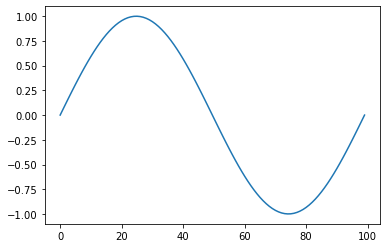

In [7]:
# %matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
plt.plot(np.sin(np.linspace(0,2*np.pi, 100)))

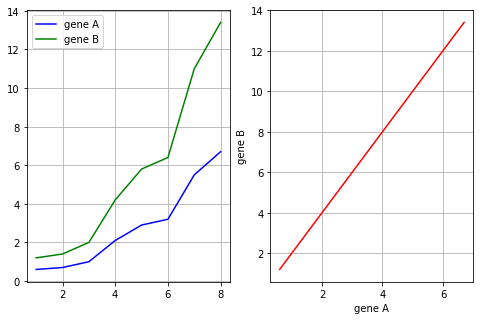

In [16]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(np.arange(1,genes.shape[0]+1),genes[:,0],color='b',label='gene A')
plt.plot(np.arange(1,genes.shape[0]+1),genes[:,1],color='g',label='gene B')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(genes[:,0],genes[:,1],color='r')
plt.xlabel('gene A')
plt.ylabel('gene B')
plt.grid()

左图以样本点的序号为横坐标，以基因的表达量为纵坐标；右图以基因A的表达量为横坐标，基因B的表达量为纵坐标。从左图可以看出，基因A与B的表达量的变化趋势是相同的；从右图可以看出，基因A、B的样本数据点之间呈现了线性关系，并且是正相关关系，此时有做进一步相关分析的必要。

In [18]:
import scipy.stats as stats

AB_pearson_coef,AB_pv = stats.pearsonr(genes[:,0],genes[:,1])
print(f'基因A与基因B之间的皮尔逊相关系数为：{AB_pearson_coef}\n显著性检验概率为：{AB_pv}')

基因A与基因B之间的皮尔逊相关系数为：0.9999999999999999
显著性检验概率为：3.42113882891801e-48


```结果分析```

基因A与B之间存在完全线性相关关系，并且具有极显著的统计学意义。

```思考```：  

基因A与C之间是否存在线性关系？如何确定其相关程度？

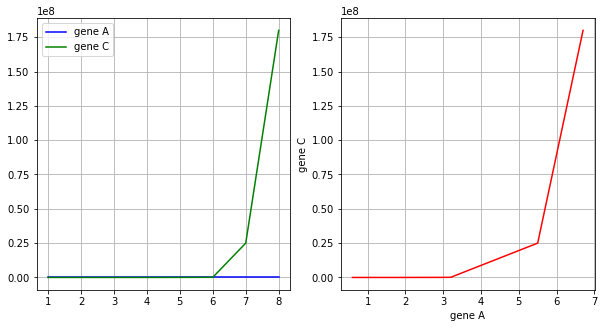

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(np.arange(1,genes.shape[0]+1),genes[:,0],color='b',label='gene A')
plt.plot(np.arange(1,genes.shape[0]+1),genes[:,2],color='g',label='gene C')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(genes[:,0],genes[:,2],color='r')
plt.xlabel('gene A')
plt.ylabel('gene C')
plt.grid()

左图以样本点的序号为横坐标，以基因的表达量为纵坐标；右图以基因A的表达量为横坐标，基因C的表达量为纵坐标。从左图中可以看到基因A与C的表达量变化趋势关系不明确；从右图可以看到基因A与C的表达量之间呈现指数函数的关系。

In [21]:
AC_pearson_coef,AC_pv = stats.pearsonr(genes[:,0],genes[:,2])
print(f'基因A与基因B之间的皮尔逊相关系数为：{AC_pearson_coef}\n显著性检验概率为：{AC_pv}')

基因A与基因B之间的皮尔逊相关系数为：0.7658950957256104
显著性检验概率为：0.02670729501040345


```结果分析```  

可以看到，基因A与基因C之间的皮尔逊相关系数的显著性检验概率为0.028，大于显著性检验水平（0.01），但是可以得出“基因A和基因C的表达量之间存在相关性且相关系数为0.767不具备显著的统计学意义”这样的结论吗？答案是否定的。**皮尔逊相关系数只适用于线性相关。而基因A与C表达量的关系明显呈现出了非线性相关，因此可以考虑使用另一种相关系数的衡量指标——斯皮尔曼等级相关系数。**

In [22]:
# 使用 斯皮尔曼 相关系数时，首先将数据转换为等级数据。

rank_A = stats.rankdata(genes[:,0])
print(genes[:,0],rank_A,sep='\n')

rank_C = stats.rankdata(genes[:,2])
print(genes[:,2],rank_C,sep='\n')

[0.6 0.7 1.  2.1 2.9 3.2 5.5 6.7]
[1. 2. 3. 4. 5. 6. 7. 8.]
[6.0e-03 2.8e-02 1.0e+00 1.7e+03 4.2e+04 1.1e+05 2.5e+07 1.8e+08]
[1. 2. 3. 4. 5. 6. 7. 8.]


**等级数据**：  

变量值以等级次序排列。可以调用 scipy.stats 下面的rankdata函数将普通连续型变量转为等级数据。其转换基本思想是：首先对原始数据进行排列，将其序号作为等级值，如果多个数据具有相同值，会根据rankdata的参数设置取多个相关值得最小、最大或者平均等级作为等级值。

In [23]:
AC_spearman_coef, AC_pv = stats.spearmanr(rank_A, rank_C)
print(f'基因A与基因B之间的斯皮尔曼相关系数为：{AC_spearman_coef}\n显著性检验概率为：{AC_pv}')

基因A与基因B之间的斯皮尔曼相关系数为：1.0
显著性检验概率为：0.0
